In [1]:
import warnings
warnings.filterwarnings('ignore')
    
import arviz as az
import astropy.coordinates as coord
import astropy.table as at
import astropy.units as u
from gala.units import UnitSystem
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pymc3 as pm
import pymc3_ext as pmx
from tqdm.notebook import tqdm
import astropy.table as at
from aesara_theano_fallback import tensor as tt
import exoplanet.units as xu
import json
import corner
import pandas as pd

from yellowcard.model_pymc3 import TimingArgumentModelPymc3

In [2]:
plt.rcParams.update({"text.usetex":False,"font.size":16})

palette = {"Dark":"#044751","Hydro": "#B6DAFF", 
           "All Pairs":"#668AFF", "Major Pairs": "#7B55F3",
           "Minor Pairs":'#FFB201',"Minor Plus Pairs":"#FF6300",
           "Extra":"#DE2280","Stellar":"#0A68DD",
           "Halo":"#4B0094","Max Halo":"#FF6BB7"}

In [3]:
usys = UnitSystem(1e12*u.Msun, u.kpc, u.Gyr, u.radian)

____
# Calculate means

In [4]:
modelChoices = ["vdm2012","fiducial2021"]


## Mass vs. vtravel

In [5]:
# --------------------- #
# get those means bby!! #
# --------------------- #
vtravels = np.arange(0,105,5)

means_vtravel = {}
stds_vtravel = {}


for mod in modelChoices:
    means_vtravel[mod]={}
    stds_vtravel[mod]={}
    Ms, rs, es = [],[],[]
    Ms_stds, rs_stds, es_stds = [],[],[]
    means_vtravel[mod]['vtravel'] = vtravels
    stds_vtravel[mod]['vtravel'] = vtravels
    
    for vs in vtravels:
        data = az.from_json(f"../pymc3-data/{mod}_vtravel_{vs}.json")
        
        for param,arr,arr_stds in zip(["M","r","e"],[Ms,rs,es],[Ms_stds, rs_stds, es_stds]):
            arr.append(np.asarray((data.posterior[param]).mean()))
            arr_stds.append(np.asarray((data.posterior[param]).std()))
            
    for param,arr,arr_stds  in zip(["M","r","e"],[Ms,rs,es],[Ms_stds, rs_stds, es_stds]):
        means_vtravel[mod][param] = np.array(arr)
        stds_vtravel[mod][param] = np.array(arr_stds)


## Measured vtravel

In [6]:
vtravels_meas = np.array([0,32])
means_vtravel_meas = {}
stds_vtravel_meas = {}

for mod in modelChoices:
    means_vtravel_meas[mod]={}
    stds_vtravel_meas[mod]={}
    Ms, rs, es = [],[],[]
    Ms_stds, rs_stds, es_stds = [],[],[]
    means_vtravel_meas[mod]['vtravel'] = vtravels_meas
    stds_vtravel_meas[mod]['vtravel'] = vtravels_meas
    
    for vs in vtravels_meas:
        data = az.from_json(f"../pymc3-data/{mod}_vtravel_{vs}.json")

        for param,arr,arr_stds in zip(["M","r","e"],[Ms,rs,es],[Ms_stds, rs_stds, es_stds]):
            arr.append(np.asarray((data.posterior[param]).mean()))
            arr_stds.append(np.asarray((data.posterior[param]).std()))

        for param,arr,arr_stds  in zip(["M","r","e"],[Ms,rs,es],[Ms_stds, rs_stds, es_stds]):
            means_vtravel_meas[mod][param] = np.array(arr)
            stds_vtravel_meas[mod][param] = np.array(arr_stds)

## Mass error vs. pm error

In [7]:
# mass error as function of proper motion
pm_errs = np.array([1,2,4,8,16])

means_pmimprov = {}
stds_pmimprov = {}


for mod in modelChoices:
    means_pmimprov[mod]={}
    stds_pmimprov[mod]={}
    Ms, rs, es = [],[],[]
    Ms_stds, rs_stds, es_stds = [],[],[]
    means_pmimprov[mod]['pm_errs'] = pm_errs
    stds_pmimprov[mod]['pm_errs'] = pm_errs
    
    for improv in pm_errs:
        data = az.from_json(f"../pymc3-data/{mod}_pmimprov_{improv}.json")

        
        for param,arr,arr_stds in zip(["M","r","e"],[Ms,rs,es],[Ms_stds, rs_stds, es_stds]):
            arr.append(np.asarray((data.posterior[param]).mean()))
            arr_stds.append(np.asarray((data.posterior[param]).std()))
            
    for param,arr,arr_stds  in zip(["M","r","e"],[Ms,rs,es],[Ms_stds, rs_stds, es_stds]):
        means_pmimprov[mod][param] = np.array(arr)
        stds_pmimprov[mod][param] = np.array(arr_stds)
                

___

*TODO:*
----------

need to rerun with mike's satellite direction vector

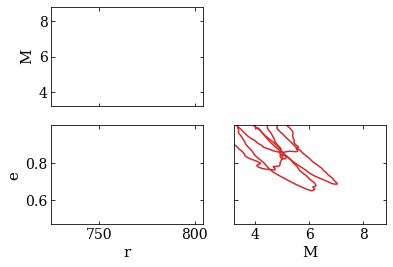

In [16]:
modelChoices = ["vdm2012","fiducial2021"]
include_vTravel = ["0", "32"]


fig,ax = plt.subplots(2,2)
for mod in modelChoices:
    for incl in include_vTravel:
        data = az.from_json(f"../pymc3-data/{mod}_vtravel_{incl}.json")
        az.plot_pair(data, 
                     kind='kde', 
                     contour=True,
                     var_names=['r', 'M', 'e'], 
                     fill_last=False, 
                     kde_kwargs=dict(contourf_kwargs={"alpha":0}, 
                                     contour_kwargs={"colors": "tab:red","levels":[0.14,0.86]}),
                     ax=ax)


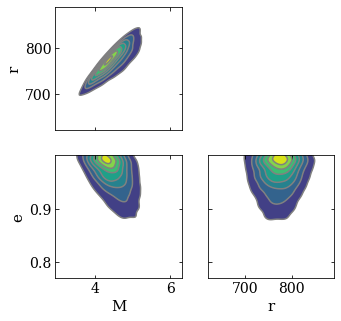

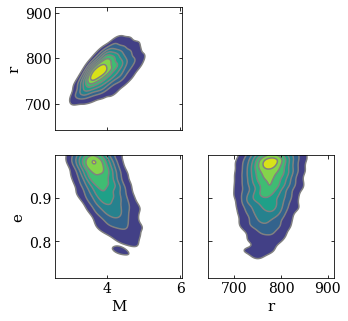

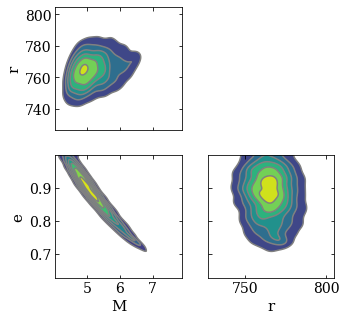

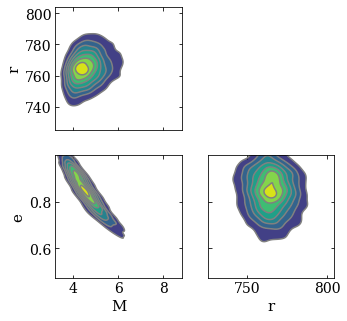

In [17]:


for mod in modelChoices:
    for incl in include_vTravel:
        data = az.from_json(f"../pymc3-data/{mod}_vtravel_{incl}.json")
        az.plot_pair(data, 
                     kind='kde',
                     show=True,
                     var_names=['M', 'r','e'],
                     figsize=(5,5))

___
# Plots

## Model Comparison

32 vdm2012 van der Marel+ 2012 solid
32 fiducial2021 Chamberlain+ 2021 solid
0 vdm2012 van der Marel+ 2012 dotted
0 fiducial2021 Chamberlain+ 2021 dotted


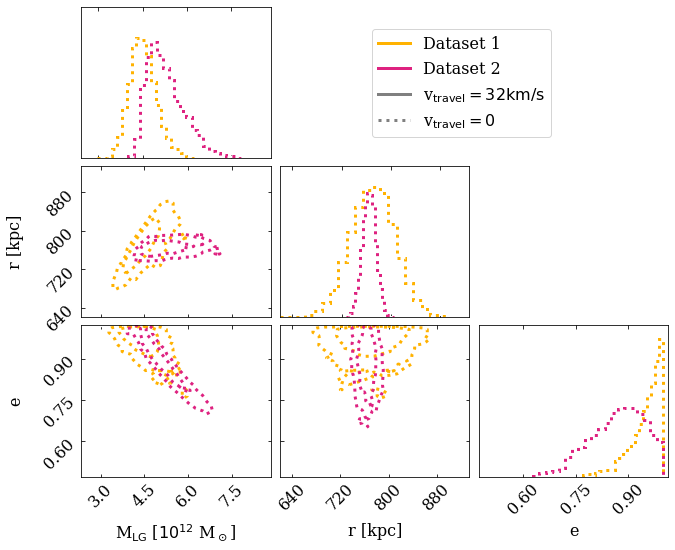

In [67]:
modelChoices = ["vdm2012","fiducial2021"]
label_model = ["van der Marel+ 2012","Chamberlain+ 2021"]
include_vTravel = ["32","0"]
# color = [palette['Minor Pairs'],palette["Extra"],palette['Minor Pairs'],palette["Extra"]]
# color = ["white","white","white","white"]
color = ["white","white",palette['Minor Pairs'],palette["Extra"]]
style = ['solid','solid','dotted','dotted']
widths = [2,2,3,3]


i=0
fig = plt.figure(figsize=(10,8))
for incl in include_vTravel:
    for mod,name in zip(modelChoices,label_model):
    
        # uncomment if running for just dotted contours:
#         if incl != "0":
#             i+=1
#             continue
        print(incl, mod, name,style[i])
        data = az.from_json(f"../pymc3-data/{mod}_vtravel_{incl}.json")
        howdy = np.vstack([np.asarray(data.posterior[i]).ravel() for i in ["M","r","e"]])
        corner.corner(howdy.T,
                            labels=[r"M$_{\rm LG}$ [$10^{12}$ M$_\odot$]","r [kpc]","e"],
                            plot_datapoints=False,
                            plot_density=False,
                            color=color[i],
                            linestyles=style[i],
                            fig=fig,
                            levels=[0.68, 0.95],
                            contour_kwargs={"linestyles":style[i],"linewidths":widths[i]},
                            hist_kwargs={"linestyle":style[i],"linewidth":widths[i]},
                            contourf_kwargs={"linestyles":style[i]},
#                             range=[(2.9,7.5), (640,880), (0.56,1)]
                     );
        i+=1
        
fig.savefig(f'../plots/analyze-runs-contour.png',dpi=300)
plt.plot(0,0,lw=3,color=color[2],label="Dataset 1")
plt.plot(0,0,lw=3,color=color[3],label="Dataset 2")
plt.plot(0,0,lw=3,color="grey",label=r"v$_{\rm travel} = \rm 32km/s$")
plt.plot(0,0,lw=3,color="grey",linestyle="dotted",label=r"v$_{\rm travel} = 0$")
fig.legend(loc=(0.55,0.75))
# plt.savefig("../plots/analyze-runs-contour.png",dpi=300)
plt.savefig("../plots/analyze-runs-contour_dotted.png",dpi=300)
# plt.savefig("../plots/analyze-runs-contour_white.png",dpi=300)
plt.show()





___
## Mass vs vtravel

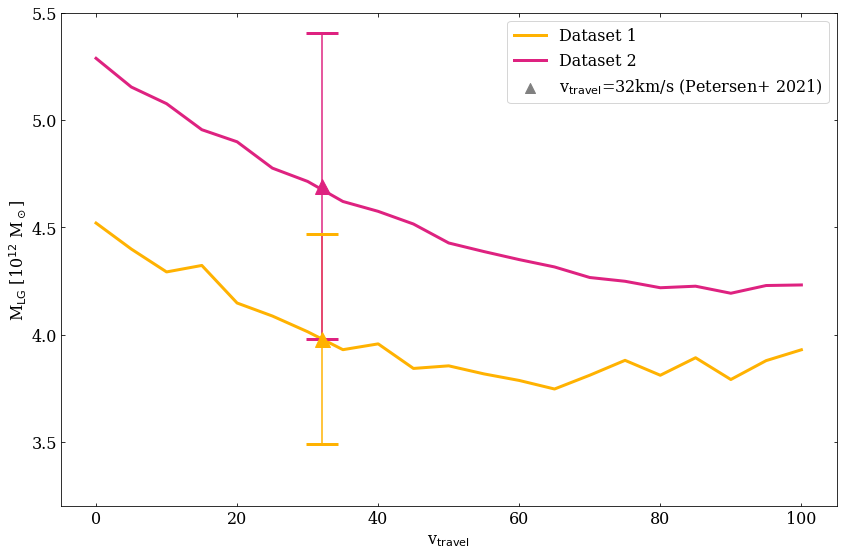

In [35]:
modelChoices = ["vdm2012","fiducial2021"]
label_model = ["vdM+ 2012 dataset","Chamberlain+ 2021 dataset"]
label_model = ["Dataset 1","Dataset 2"]


color = [palette['Minor Pairs'],palette["Extra"]]
alpha = [0,0]

fig,ax=plt.subplots(figsize=(12,8))
for mod,lab,col,al in zip(modelChoices,label_model,color,alpha):
    bottoms = means_vtravel[mod]['M']-stds_vtravel[mod]['M']
    tops = means_vtravel[mod]['M']+stds_vtravel[mod]['M']
    
    plt.plot(means_vtravel[mod]['vtravel'], means_vtravel[mod]['M'],
             label=lab, color=col, lw=3)

for mod,lab,col,al in zip(modelChoices,label_model,color,alpha):
    plt.errorbar(x=means_vtravel_meas[mod]['vtravel'][1]+al, 
                 y=means_vtravel_meas[mod]['M'][1],
                 yerr=stds_vtravel_meas[mod]['M'][1],
                 color=col,capsize=16,
                 capthick=3,marker='^',ms=15)

plt.scatter(0,0,label=r'v$_{\rm travel}$=32km/s (Petersen+ 2021)',marker="^",s=100,color='grey')
ax.set_xlabel(r'v$_{\rm travel}$')
ax.set_ylabel(r'M$_{\rm LG}$ [10$^{12}$ M$_\odot$]')
plt.legend()
plt.ylim(3.2,5.5)
plt.tight_layout()
plt.savefig("../plots/analyze-runs-MvV.png",dpi=300)
plt.show()

___
## Mass constraint vs. pm error

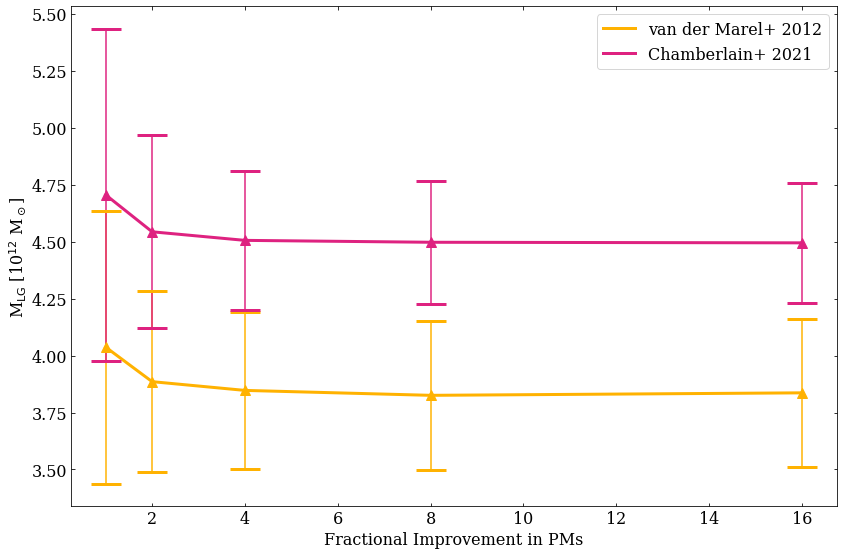

In [8]:
modelChoices = ["vdm2012","fiducial2021"]
label_model = ["van der Marel+ 2012","Chamberlain+ 2021"]


color = [palette['Minor Pairs'],palette["Extra"]]
alpha = [0.2,0.4]

fig,ax=plt.subplots(figsize=(12,8))
for mod,lab,col,al in zip(modelChoices,label_model,color,alpha):
    
    plt.plot(means_pmimprov[mod]['pm_errs'], means_pmimprov[mod]['M'],
             label=lab, color=col, lw=3)

for mod,lab,col,al in zip(modelChoices,label_model,color,alpha):
    plt.errorbar(x=means_pmimprov[mod]['pm_errs'], 
                 y=means_pmimprov[mod]['M'],
                 yerr=stds_pmimprov[mod]['M'],
                 color=col, capsize=15,
                 capthick=3, marker='^',ms=10,
                 linestyle="")

# plt.scatter(0,0,label=r'v$_{\rm travel}$ from P21',marker="^",s=80,color='grey')
ax.set_xlabel(r'Fractional Improvement in PMs')
ax.set_ylabel(r'M$_{\rm LG}$ [10$^{12}$ M$_\odot$]')
plt.legend()
# plt.ylim(3.2,5.5)
plt.tight_layout()
plt.savefig("../plots/analyze-runs-MvsPM.png",dpi=300)
plt.show()

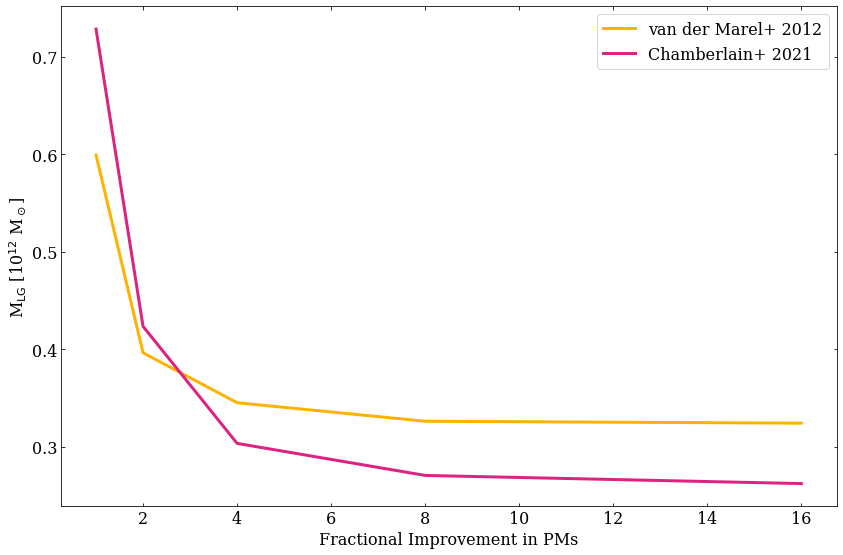

In [26]:
modelChoices = ["vdm2012","fiducial2021"]
label_model = ["van der Marel+ 2012","Chamberlain+ 2021"]


color = [palette['Minor Pairs'],palette["Extra"]]
alpha = [0.2,0.4]

fig,ax=plt.subplots(figsize=(12,8))
for mod,lab,col,al in zip(modelChoices,label_model,color,alpha):
    
    plt.plot(means_pmimprov[mod]['pm_errs'], stds_pmimprov[mod]['M'],
             label=lab, color=col, lw=3)

# for mod,lab,col,al in zip(modelChoices,label_model,color,alpha):
#     plt.errorbar(x=means_pmimprov[mod]['pm_errs'], 
#                  y=means_pmimprov[mod]['M'],
#                  yerr=stds_pmimprov[mod]['M'],
#                  color=col, capsize=15,
#                  capthick=3, marker='^',ms=10,
#                  linestyle="")

# plt.scatter(0,0,label=r'v$_{\rm travel}$ from P21',marker="^",s=80,color='grey')
ax.set_xlabel(r'Fractional Improvement in PMs')
ax.set_ylabel(r'M$_{\rm LG}$ [10$^{12}$ M$_\odot$]')
plt.legend()
# plt.ylim(3.2,5.5)
plt.tight_layout()
plt.savefig("../plots/analyze-runs-MvsPM.png",dpi=300)
plt.show()

In [41]:
stds_pmimprov['vdm2012']["pm_errs"]==10

array([False, False, False, False,  True, False, False, False, False])

In [43]:
stds_pmimprov['vdm2012']["M"][stds_pmimprov['vdm2012']["pm_errs"]==10]

array([1.39685868])

---